In [1]:
#Types of Regularized Regression - Ridge Regresssion, Lasso Regression
# - To penalize larger positive or negative coef

#Ridge Regression - alpha (need to specify) => 0 (overfitting) , => larger (underfitting)->getting worse
#Loss function= OLS loss functioon  + alpha* i=1 to n (ai)^2

import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = {
    'tv': [13000.0, 41000.0, 23000.0, 54000.0, 12000.0],
    'radio': [9237.76, 15886.45, 10500.34, 12000.56, 8500.23],
    'social_media': [2409.57, 2913.41, 3100.89, 4300.45, 2000.56],
    'sales': [46677.90, 150177.83, 89000.50, 210000.75, 35000.40]
}
new_data = {
    'tv': [35000.0, 15000.0, 30000.0, 50000.0, 18000.0],
    'radio': [11000.34, 7200.87, 13300.56, 9500.34, 8800.65],
    'social_media': [3200.56, 2700.45, 4100.67, 3700.78, 2200.45],
    'sales': [120000.50, 45000.75, 134000.80, 165000.90, 57000.45]
}

# Combine original data and new data
for key in data.keys():
    data[key].extend(new_data[key])

sales_df=pd.DataFrame(data)
X=sales_df.drop('sales',axis=1).values
y=sales_df['sales'].values

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=43)

# Instantiate standard scaler
scaler=StandardScaler()
# Fit and Transform the scaler in training and test data
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


scores=[]
for alpha in [0.1,1.0,10.0,100.0,1000.0]:
    ridge=Ridge(alpha=alpha)
    ridge.fit(X_train_scaled,y_train)
    y_pred=ridge.predict(X_test_scaled)
    scores.append(ridge.score(X_test_scaled,y_test))
    print(y_pred)
    
print(scores)

[192672.49025168  54370.97636771  50258.88169044]
[186460.88274191  56200.12907878  53777.44179536]
[154661.80215552  73117.71106269  72797.18489204]
[115914.21226801  98672.35503884  98628.40620306]
[106842.80475264 104901.49819436 104896.52773655]
[0.9802180013878948, 0.9626730987619432, 0.7580763190865036, 0.20449442700645004, 0.023777103456299242]


In [2]:
#Lasso Regression -> Loss function= OLS loss Function+ alpha*i=1 to n |ai|

from sklearn.linear_model import Lasso

scores=[]
for alpha in [0.1,1.0,5.0,10.0,15.0,20.0,25.0,30.0]:
    lasso=Lasso(alpha= alpha)
    lasso.fit(X_train_scaled,y_train)
    y_pred=lasso.predict(X_test_scaled)
    print(y_pred)
    scores.append(lasso.score(X_test_scaled,y_test))
    
print(scores)

[193450.29596748  54218.39623818  49808.64569091]
[193448.91256406  54219.73656196  49809.47161613]
[193441.51758469  54225.99246245  49816.23937359]
[193432.27386048  54233.81233807  49824.69907041]
[193423.03013626  54241.63221368  49833.15876722]
[193413.78641205  54249.4520893   49841.61846404]
[193404.54268783  54257.27196492  49850.07816086]
[193395.29896362  54265.09184053  49858.53785768]
[0.9819938139539519, 0.9819910796727529, 0.9819748184799858, 0.9819544687884244, 0.9819340933184159, 0.98191369206996, 0.9818932650430571, 0.9818728122377068]


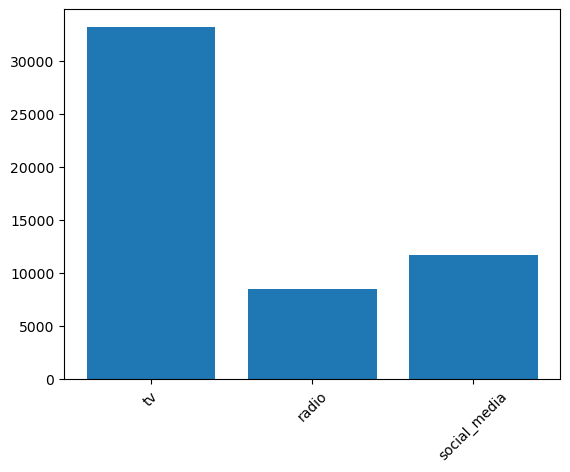

In [3]:
# Lasso Regression for feature selection
# Lasso can select important features of a dataset => Shrink the coef of less important features to 0

lasso=Lasso(alpha=0.1)
names=sales_df.drop('sales',axis=1).columns
lasso_coef= lasso.fit(X_train_scaled,y_train).coef_

plt.bar(names,lasso_coef) #which are important
plt.xticks(rotation=45)
plt.show()